In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
import numpy as np
import math
import random
random.seed(0)
np.random.seed(0)
import warnings 
warnings.filterwarnings('ignore')

In [26]:
x_train, y_train = [], []
with open('wine.data') as f:
    for line in f.readlines():
        split_line = line.split(',')
        split_line[-1] = split_line[-1].replace('\n', '')
        label = int(split_line[0])
        feats = [float(x) for x in split_line[1:]]
        if label == 1 or label == 2:
            x_train.append(feats)
            if label == 1:
                label = -1
            else:
                label = 1
            y_train.append(label)

In [27]:
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)

In [28]:
lr_clf = LogisticRegression(penalty="none",verbose=0, fit_intercept=False)

In [29]:
lr_clf.fit(scaled_x_train, y_train)

LogisticRegression(fit_intercept=False, penalty='none')

In [10]:
def loss_f(weights, x_t, y_t):
    loss = 0
    for i in range(len(x_t)):
        loss += math.log(1 + math.exp(-y_t[i] * np.dot(weights, x_t[i])))
    return loss

In [11]:
coefs = lr_clf.coef_
l_star = loss_f(coefs[0], scaled_x_train, y_train)
print(l_star)

0.0002793446179289648


In [12]:
def calculate_gradient(coord, weights, x_t, y_t):
    grad = 0
    for i in range(len(x_t)):
        grad += -(y_t[i] * x_t[i][coord]) / (1 + math.exp(y_t[i]*np.dot(weights, x_t[i])))
    return grad

In [13]:
def random_cd(x_t, y_t, lr =1e-1):
    losses = []
    updates = []
    prev_loss = 1e8
    weights = [0] * len(x_t[0])
    i=1
    count = 0
    indices = range(13)
    while True:
        coord_to_update = random.sample(indices,1)[0]
        grad = calculate_gradient(coord_to_update, weights, x_t, y_t)
        weights[coord_to_update] = weights[coord_to_update] - lr*grad
        loss = loss_f(weights, x_t, y_t)
        losses.append(loss)
        updates.append(i)
        if prev_loss - loss > 1e-7:
            count=0
        else:
            count+=1
        if i==50000:
            break
        if count==10:
            break
        prev_loss = loss
        i+=1

        
    return weights, losses, updates

In [14]:
random_coord_weights, losses, updates = random_cd(scaled_x_train, y_train)

In [15]:
print(losses[-1])

0.01956980028118074


In [16]:
def greedy_cd(x_t, y_t, lr =1e-1):
    losses = []
    updates = []
    prev_loss = 1e8
    weights = [0] * len(x_t[0])
    i=1
    count = 0
    indices = range(13)
    while True:
        grads = [calculate_gradient(i, weights, x_t, y_t) for i in range(len(weights))]
        abs_grads = [abs(grad) for grad in grads]
        coord_to_update = np.argmax(abs_grads)
        weights[coord_to_update] = weights[coord_to_update] - lr*grads[coord_to_update]
        loss = loss_f(weights, x_t, y_t)
        losses.append(loss)
        updates.append(i)
        if prev_loss - loss > 1e-7:
            count=0
        else:
            count+=1
        if i==50000:
            break
        if count==10:
            break
        prev_loss = loss
        i+=1

        
    return weights, losses, updates

In [17]:
greedy_coord_weights, greedy_losses, greedy_updates = greedy_cd(scaled_x_train, y_train)
print(greedy_losses[-1])

0.0052062996061273265


In [18]:
import matplotlib.pyplot as plt

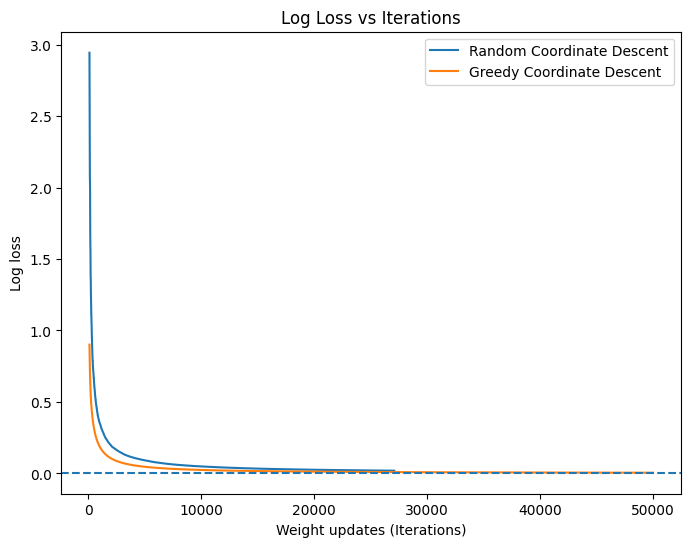

In [19]:
plt.figure(figsize=(8,6))
plt.plot(updates[100:], losses[100:], label= 'Random Coordinate Descent')
plt.plot(greedy_updates[100:], greedy_losses[100:], label = 'Greedy Coordinate Descent')
plt.axhline(0.00027934, ls='--')
plt.legend()
plt.xlabel('Weight updates (Iterations)')
plt.ylabel('Log loss')
plt.title("Log Loss vs Iterations")
plt.show()